In [1]:
from os.path import join as pjoin
import os
import glob
import numpy as np
import seaborn as sns
import scipy
from scipy.signal import periodogram
import matplotlib.pyplot as plt

# How many components do we have per run/subject

- Subjects vary in their number of components
- Within one subject, runs can have different number of components

--> Need for manual selection per subject

In [2]:
# iterate through melodic out dirs
ncomps = []
for ind in range(4):
    melodic_outdir = '/home/homeGlobal/oli/somato/scratch/ica/MELODIC/melodic_wf_workdir/run_lvl/somato_melodic_wf/melodic/mapflow/_melodic%i/' % ind
    zstat_files = glob.glob(pjoin(melodic_outdir, 'stats', 'thresh_*'))
    ncomps.append(len(zstat_files))
    
print(ncomps)

[31, 36, 30, 30]


# First run of first subject as example

In [3]:
ncomps_sub1=31
melodic_outdir_s1 = '/home/homeGlobal/oli/somato/scratch/ica/MELODIC/melodic_wf_workdir/run_lvl/somato_melodic_wf/melodic/mapflow/_melodic0/'
#os.path.exists(melodic_outdir_s1)

First, find those components whose maximum frequency is a multiple of our stimulation frequency

In [4]:
factors_comps = []
multiples_comps = []
exact_comps = []

for idx, comp_id in enumerate(range(1,ncomps_sub1+1)):
    tsfile = pjoin(melodic_outdir_s1, 'report/t%i.txt' % comp_id)
    ts_arr = np.loadtxt(tsfile)
    
    frequencies, powerdensities = periodogram(ts_arr)
    maxid = np.argmax(powerdensities)
    maxfreq, maxpower = frequencies[maxid], powerdensities[maxid]
    
    if maxfreq % .0390625 == 0:
        multiples_comps.append(idx)
    elif .0390625 % maxfreq == 0:
        factors_comps.append(idx)
    elif maxfreq == .0390625:
        exact_comps.append(idx)

print("""
of the %i independent components in this functional run
%i are multiples of the stimulus frequency
%i are factors of the stimulus frequency
%i match the stimulus frequency perfectly
""" % (ncomps_sub1, len(multiples_comps), len(factors_comps), len(exact_comps)))


of the 31 independent components in this functional run
2 are multiples of the stimulus frequency
21 are factors of the stimulus frequency
0 match the stimulus frequency perfectly



Plot all independent components and highlight the matched ones with bold row titles.

- **red**: exact matche with stimulus frequency
- **green**: max frequency is divisible by stimulus frequency
- **blue**: max frequency is multiple of stimulus frequency

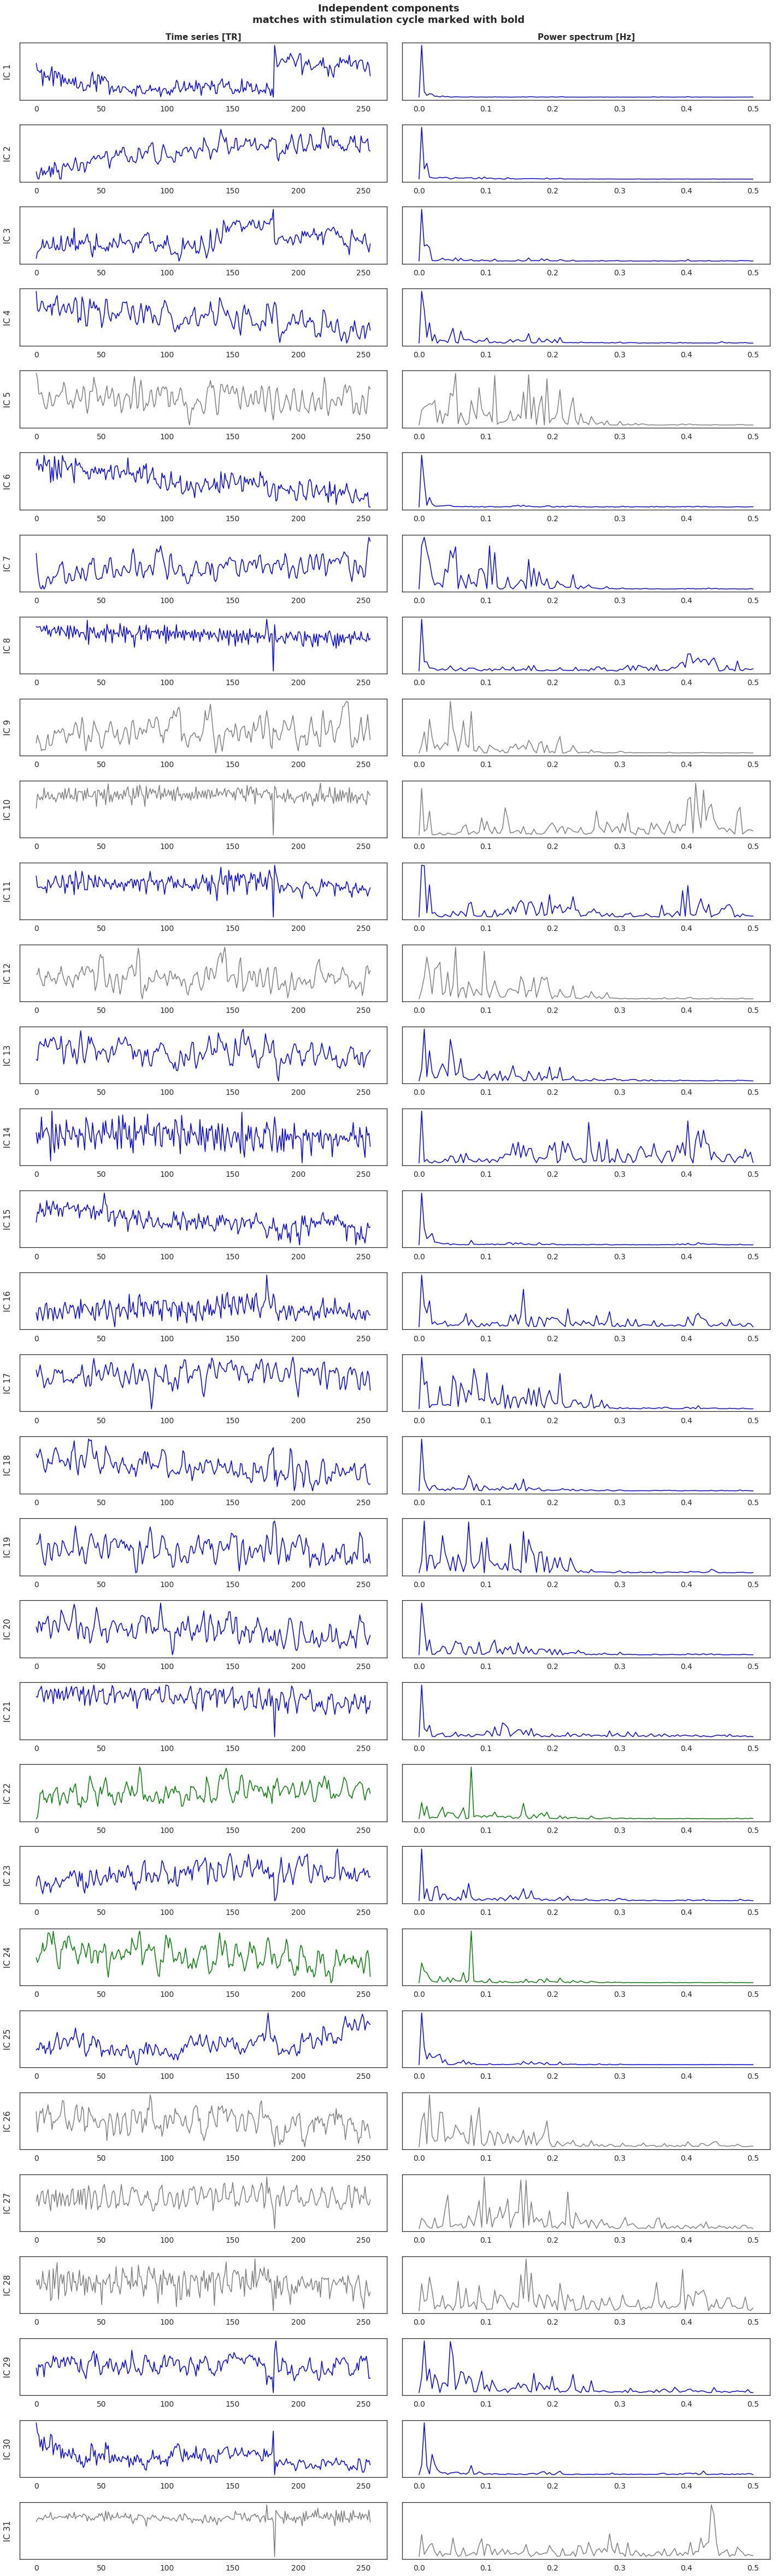

In [5]:
# set up figure
sns.set(font_scale=1.25, style='white', context='notebook')
fig, axs = plt.subplots(ncols=2, nrows=ncomps_sub1, figsize=(20,65))

# iterate through all components
for comp_id, axis in zip(range(ncomps_sub1), axs):
    # load time series file output from melodic
    tsfile = pjoin(melodic_outdir_s1, 'report/t%i.txt' % (comp_id+1))
    ts_arr = np.loadtxt(tsfile)
    # calculate powerspectrum
    frequencies, powerdensities = periodogram(ts_arr)

    # set color depending on whether maxfrequency is 
    # multiple of or divisible by target frequency
    if comp_id in multiples_comps:
        lineplot_kws = {'color': 'green'}
    elif comp_id in factors_comps:
        lineplot_kws = {'color': 'blue'}
    elif comp_id in exact_comps:
        lineplot_kws = {'color': 'red'}
    else:
        lineplot_kws = {'color': 'grey'}
    
    # plot ts and powerspectrum 
    sns.lineplot(y=ts_arr, x=range(len(ts_arr)), ax=axis[0], **lineplot_kws)
    sns.lineplot(y=powerdensities, x=frequencies, ax=axis[1], **lineplot_kws)
    
    # set row title
    axis[0].set_ylabel('IC %i' % (comp_id+1), rotation=90)
    # remove y ticks for less clutter
    axis[0].set_yticklabels([])
    axis[1].set_yticklabels([])
# set titles for the two rows
axs[0][0].set_title('Time series [TR]', fontweight='bold')
axs[0][1].set_title('Power spectrum [Hz]', fontweight='bold')
fig.suptitle('Independent components\nmatches with stimulation cycle marked with bold', fontweight='bold', y=1.008)
fig.tight_layout()

IC 24 looks interesting, since close to hand know. What's its max frequency?

In [6]:
tsfile = pjoin(melodic_outdir_s1, 'report/t24.txt')
ts_arr = np.loadtxt(tsfile)
frequencies, powerdensities = periodogram(ts_arr)
maxid = np.argmax(powerdensities)
maxfreq, maxpower = frequencies[maxid], powerdensities[maxid]
print(maxfreq)
print(maxpower)

0.078125
64.1325392817506


In [7]:
0.078125 % .0390625 

0.0

# Second run of first subject

In [8]:
ncomps_sub1=31
melodic_outdir_run2 = '/home/homeGlobal/oli/somato/scratch/ica/MELODIC/melodic_wf_workdir/run_lvl/somato_melodic_wf/melodic/mapflow/_melodic1/'
#os.path.exists(melodic_outdir_s1)

In [9]:
factors_comps = []
multiples_comps = []
exact_comps = []

for idx, comp_id in enumerate(range(1,ncomps_sub1+1)):
    tsfile = pjoin(melodic_outdir_run2, 'report/t%i.txt' % comp_id)
    ts_arr = np.loadtxt(tsfile)
    
    frequencies, powerdensities = periodogram(ts_arr)
    maxid = np.argmax(powerdensities)
    maxfreq, maxpower = frequencies[maxid], powerdensities[maxid]
    
    if maxfreq % .0390625 == 0:
        multiples_comps.append(idx)
    elif .0390625 % maxfreq == 0:
        factors_comps.append(idx)
    elif maxfreq == .0390625:
        exact_comps.append(idx)

print("""
of the %i independent components in this functional run
%i are multiples of the stimulus frequency
%i are factors of the stimulus frequency
%i match the stimulus frequency perfectly
""" % (ncomps_sub1, len(multiples_comps), len(factors_comps), len(exact_comps)))


of the 31 independent components in this functional run
0 are multiples of the stimulus frequency
24 are factors of the stimulus frequency
0 match the stimulus frequency perfectly



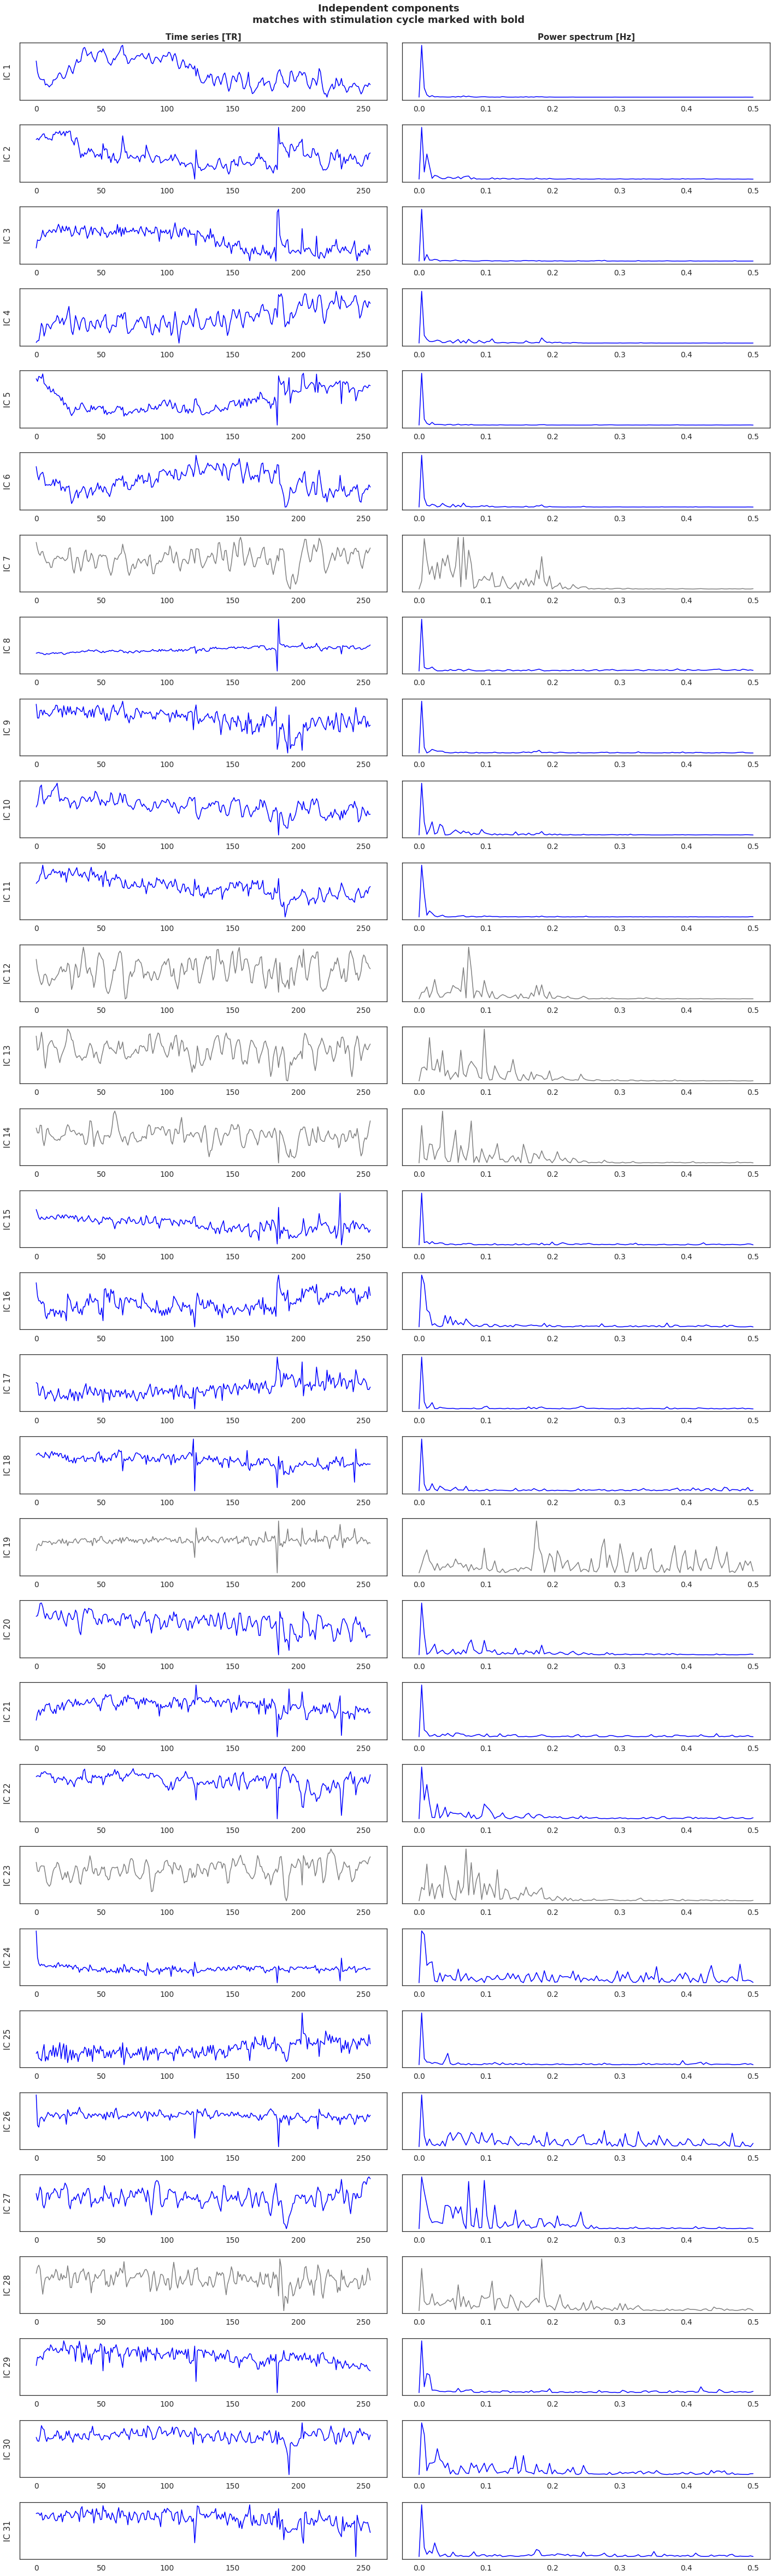

In [10]:
# set up figure
sns.set(font_scale=1.25, style='white', context='notebook')
fig, axs = plt.subplots(ncols=2, nrows=ncomps_sub1, figsize=(20,65))

# iterate through all components
for comp_id, axis in zip(range(ncomps_sub1), axs):
    # load time series file output from melodic
    tsfile = pjoin(melodic_outdir_run2, 'report/t%i.txt' % (comp_id+1))
    ts_arr = np.loadtxt(tsfile)
    # calculate powerspectrum
    frequencies, powerdensities = periodogram(ts_arr)

    # set color depending on whether maxfrequency is 
    # multiple of or divisible by target frequency
    if comp_id in multiples_comps:
        lineplot_kws = {'color': 'green'}
    elif comp_id in factors_comps:
        lineplot_kws = {'color': 'blue'}
    elif comp_id in exact_comps:
        lineplot_kws = {'color': 'red'}
    else:
        lineplot_kws = {'color': 'grey'}
    
    # plot ts and powerspectrum 
    sns.lineplot(y=ts_arr, x=range(len(ts_arr)), ax=axis[0], **lineplot_kws)
    sns.lineplot(y=powerdensities, x=frequencies, ax=axis[1], **lineplot_kws)
    
    # set row title
    axis[0].set_ylabel('IC %i' % (comp_id+1), rotation=90)
    # remove y ticks for less clutter
    axis[0].set_yticklabels([])
    axis[1].set_yticklabels([])
# set titles for the two rows
axs[0][0].set_title('Time series [TR]', fontweight='bold')
axs[0][1].set_title('Power spectrum [Hz]', fontweight='bold')
fig.suptitle('Independent components\nmatches with stimulation cycle marked with bold', fontweight='bold', y=1.008)
fig.tight_layout()